# 🧠 Loneliness Risk Detection in Urban Youth

This project explores behavioral and emotional patterns among young people to detect risk factors for loneliness. It uses a synthetic dataset that includes lifestyle indicators like screen time, sleep, mood stability, and social interaction.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("loneliness_dataset.csv"); df.head()


,StudentID,Age,CityType,ScreenTimeHours,TimeSpentAlone,SleepQualityScore,MoodStability,SocialActivityScore,FeelsLonely
0,S0001,24,Urban,6.7,2.9,1,9,1,Yes
1,S0002,21,Semi-Urban,7.0,5.0,8,4,6,No
2,S0003,22,Urban,6.0,5.0,8,3,6,Yes
3,S0004,24,Semi-Urban,5.1,2.8,9,1,5,Yes
4,S0005,20,Urban,8.6,3.5,9,2,5,Yes


In [3]:
# Check basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentID            500 non-null    object 
 1   Age                  500 non-null    int64  
 2   CityType             500 non-null    object 
 3   ScreenTimeHours      500 non-null    float64
 4   TimeSpentAlone       500 non-null    float64
 5   SleepQualityScore    500 non-null    int64  
 6   MoodStability        500 non-null    int64  
 7   SocialActivityScore  500 non-null    int64  
 8   FeelsLonely          500 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB


In [4]:
# Descriptive statistics
df.describe()


,Age,ScreenTimeHours,TimeSpentAlone,SleepQualityScore,MoodStability,SocialActivityScore
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,20.954000,6.14740,4.159800,5.140000,4.890000,5.002000
std,2.027833,2.13324,2.100635,2.544277,2.618322,2.602218
min,18.000000,0.40000,-1.200000,1.000000,1.000000,1.000000
25%,19.000000,4.70000,2.800000,3.000000,3.000000,3.000000
50%,21.000000,6.10000,4.150000,5.000000,5.000000,5.000000
75%,23.000000,7.60000,5.625000,7.000000,7.000000,7.000000
max,24.000000,12.30000,10.200000,9.000000,9.000000,9.000000


C:\Users\asna1\AppData\Local\Temp\ipykernel_2240\681428864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='FeelsLonely', palette='Set2')


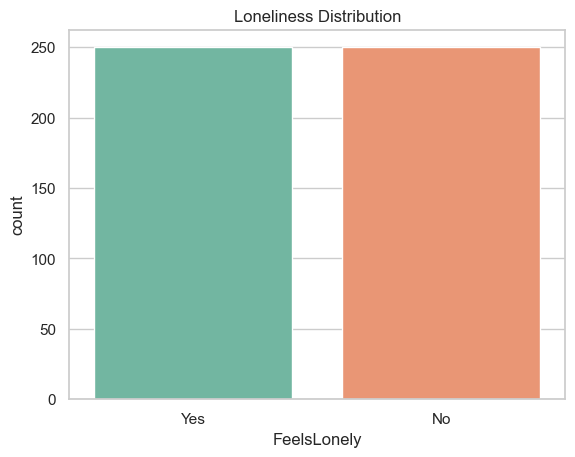

In [5]:
# Countplot for target variable
sns.countplot(data=df, x='FeelsLonely', palette='Set2')
plt.title("Loneliness Distribution")
plt.show()


C:\Users\asna1\AppData\Local\Temp\ipykernel_2240\2616334187.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FeelsLonely', y='SleepQualityScore', palette="coolwarm")


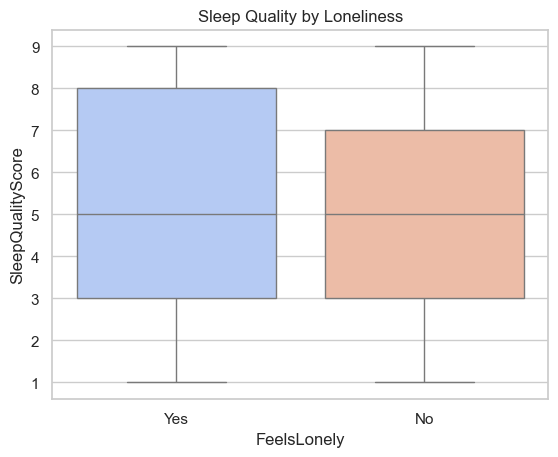

In [6]:
sns.boxplot(data=df, x='FeelsLonely', y='SleepQualityScore', palette="coolwarm")
plt.title("Sleep Quality by Loneliness")
plt.show()


C:\Users\asna1\AppData\Local\Temp\ipykernel_2240\4279238120.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='FeelsLonely', y='MoodStability', palette="coolwarm")


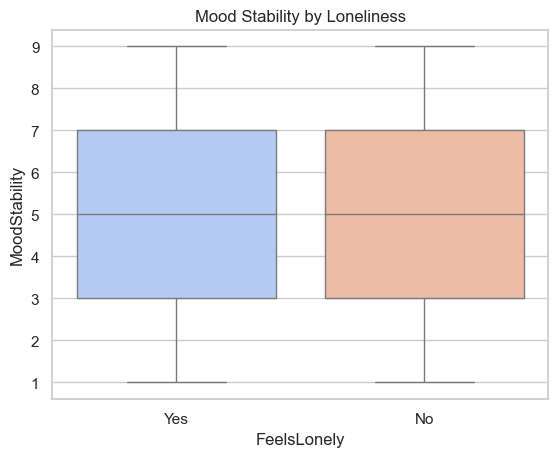

In [7]:
sns.boxplot(data=df, x='FeelsLonely', y='MoodStability', palette="coolwarm")
plt.title("Mood Stability by Loneliness")
plt.show()


C:\Users\asna1\AppData\Local\Temp\ipykernel_2240\4003784298.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='FeelsLonely', y='TimeSpentAlone', palette="muted")


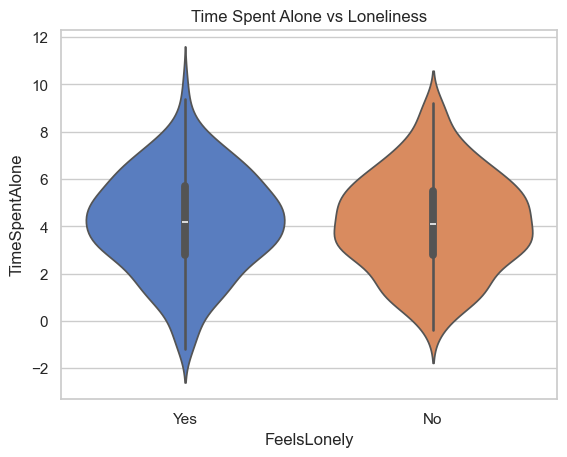

In [8]:
sns.violinplot(data=df, x='FeelsLonely', y='TimeSpentAlone', palette="muted")
plt.title("Time Spent Alone vs Loneliness")
plt.show()


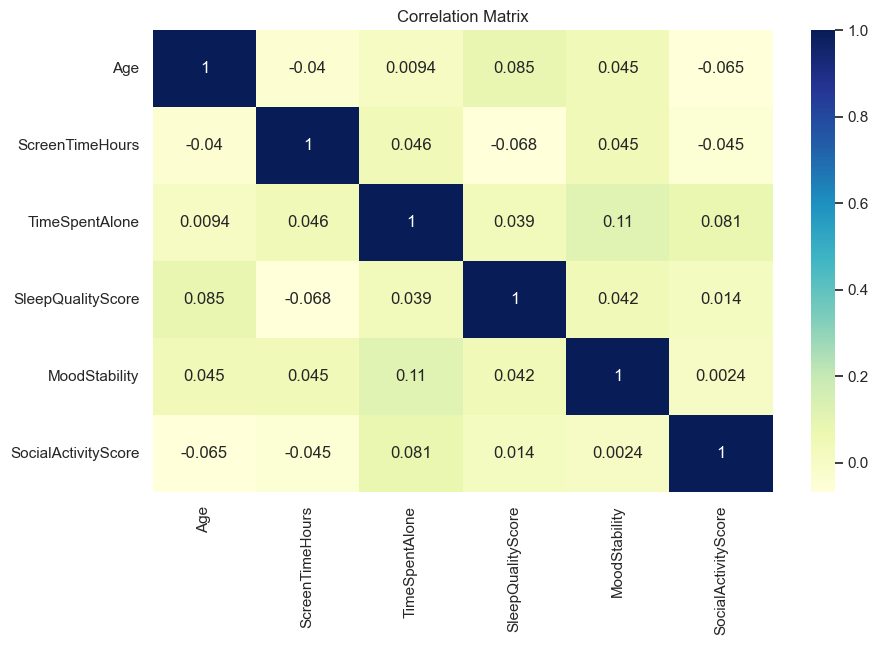

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()
df_encoded["CityType"] = le.fit_transform(df_encoded["CityType"])
df_encoded["FeelsLonely"] = le.fit_transform(df_encoded["FeelsLonely"])  # Yes=1, No=0
df_encoded.head()


,StudentID,Age,CityType,ScreenTimeHours,TimeSpentAlone,SleepQualityScore,MoodStability,SocialActivityScore,FeelsLonely
0,S0001,24,1,6.7,2.9,1,9,1,1
1,S0002,21,0,7.0,5.0,8,4,6,0
2,S0003,22,1,6.0,5.0,8,3,6,1
3,S0004,24,0,5.1,2.8,9,1,5,1
4,S0005,20,1,8.6,3.5,9,2,5,1


In [11]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(["StudentID", "FeelsLonely"], axis=1)
y = df_encoded["FeelsLonely"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Training size: (400, 7)
Test size: (100, 7)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy Score: 0.53

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.47      0.46        43
           1       0.59      0.58      0.58        57

    accuracy                           0.53       100
   macro avg       0.52      0.52      0.52       100
weighted avg       0.53      0.53      0.53       100



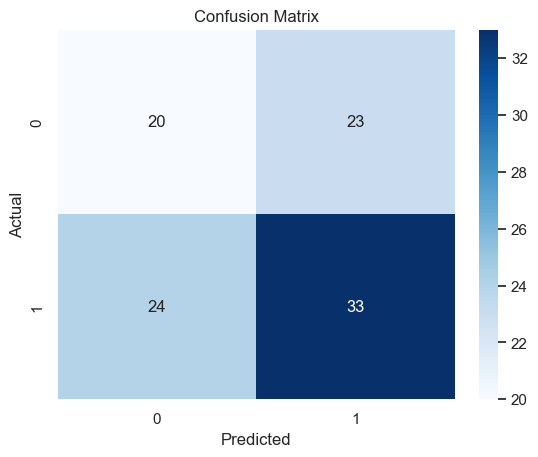

In [13]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [14]:
import joblib
joblib.dump(model, "loneliness_decision_tree_model.pkl")


['loneliness_decision_tree_model.pkl']